<center><h1>SINGING VOICE TRANSCRIPTION USING DNN</h1></center> 
<center>Rigaud and Radenen, 2016 - Implementation reproduction and results comparison</center> 


AUTHOR: Shayenne da Luz Moura

## Data pre-processing for both DNNs

Data from MedleyDB - [Select vocal musics from MusicDelta_Reggae to Wolf_DieBekherte]

- Each audio signal are converted to mono and resampled to 16kHz to reduce information and make training more faster.

- Then, pre-decomposed applying a double-stage HPSS (in the article are described the reason [2.2])

- First, input signal $s$ is decomposed into $h_1$ e $p_1$ using high-frequency resolution (window of 300 ms)

- Second, $p_1$ is further decomposed into $h_2$ e $p_2$ using a low-frequency resolution (window of 30 ms)

In [1]:
# Import libraries and modules    
from librosa import *            # Manipulate and display audio files
import librosa.display
import scipy                     # Utilize signal functions
import matplotlib.pyplot as plt  # Plot graphics
%matplotlib inline
import numpy as np               # Manipulate arrays efficiently
import os, glob                  # Find files in directories
import IPython                   # Display audio file in notebook
import csv                       # Manipulate .csv files

In [2]:
# All files from MedleyDB
path = "../MedleyDB/Audio/"

allFiles = glob.glob(path + "/*.wav")

for filename in os.listdir(path):
    if filename.endswith(".wav"):
        music = filename
        music = music[:-8]
        print (music)

StrandOfOaks_Spacestation
Snowmine_Curfews
TheDistricts_Vermont
StevenClark_Bounty
MusicDelta_Reggae
PortStWillow_StayEven
SweetLights_YouLetMeDown
PurlingHiss_Lolita
TheSoSoGlos_Emergency
Wolf_DieBekherte
Schumann_Mignon
NightPanther_Fire
MusicDelta_Rock
Schubert_Erstarrung
SecretMountains_HighHorse
TheScarletBrand_LesFleursDuMal
MusicDelta_Rockabilly


In [3]:
# Preprocess audio signal
y, sr = librosa.load(path+filename, mono=True) # Converted to mono
y_16k = librosa.resample(y, sr, 16000)
sr = 16000

# Compare shapes
print (y.shape)
print (y_16k.shape)  # Re-sampled to 16kHz

(572179,)
(415187,)


In [4]:
# STFT with Hamming window of 256ms (4096 samples) with overlap 0,75 (hop 0.25)
s = librosa.stft(y_16k, n_fft=4096, hop_length=int(4096/4), window=scipy.signal.hamming(4096))
h1, p1 = librosa.decompose.hpss(s)

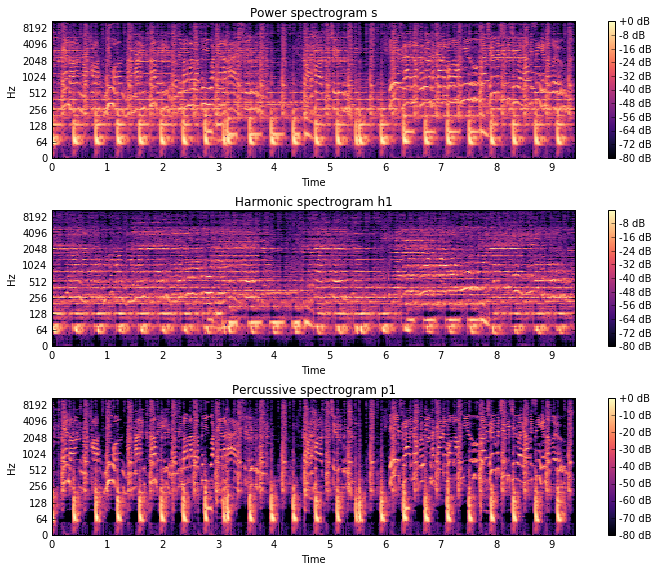

In [5]:
plt.figure(figsize=(10,8))
ax1 = plt.subplot(3,1,1)
librosa.display.specshow(librosa.amplitude_to_db(s, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram s')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

ax2 = plt.subplot(3,1,2, sharex=ax1)
librosa.display.specshow(librosa.amplitude_to_db(h1, ref=np.max), y_axis='log', x_axis='time')
plt.title('Harmonic spectrogram h1')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

ax2 = plt.subplot(3,1,3, sharex=ax1)
librosa.display.specshow(librosa.amplitude_to_db(p1, ref=np.max), y_axis='log', x_axis='time')
plt.title('Percussive spectrogram p1')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [6]:
# Original signal
IPython.display.Audio(y_16k, rate=sr)

In [7]:
# Getting signal separated - need arguments of stft
h1_inverse = librosa.istft(h1, hop_length=int(4096/4), window=scipy.signal.hamming(4096))
IPython.display.Audio(h1_inverse, rate=sr)

In [8]:
# Getting signal separated - need arguments of stft
p1_inverse = librosa.istft(p1, hop_length=int(4096/4), window=scipy.signal.hamming(4096))
IPython.display.Audio(p1_inverse, rate=sr)

In [9]:
# Getting signal - need arguments of stft
p1_inverse = librosa.istft(p1, hop_length=int(4096/4), window=scipy.signal.hamming(4096))

# STFT with Hamming window of 32ms (512 samples) with overlap 0,75 (hop 0.25)
p1_32 = librosa.stft(p1_inverse, n_fft=512, hop_length=int(512/4), window=scipy.signal.hamming(512))
h2, p2 = librosa.decompose.hpss(p1_32)

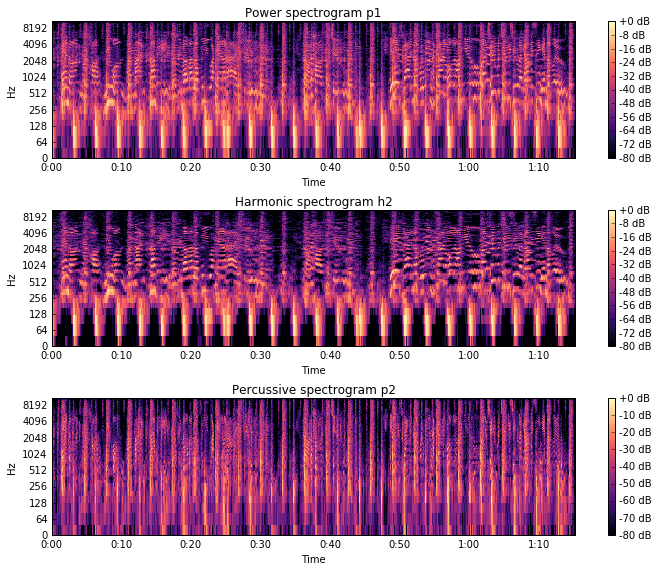

In [10]:
plt.figure(figsize=(10,8))
ax1 = plt.subplot(3,1,1)
librosa.display.specshow(librosa.amplitude_to_db(p1_32, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram p1')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

ax2 = plt.subplot(3,1,2, sharex=ax1)
librosa.display.specshow(librosa.amplitude_to_db(h2, ref=np.max), y_axis='log', x_axis='time')
plt.title('Harmonic spectrogram h2')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

ax2 = plt.subplot(3,1,3, sharex=ax1)
librosa.display.specshow(librosa.amplitude_to_db(p2, ref=np.max), y_axis='log', x_axis='time')
plt.title('Percussive spectrogram p2')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [11]:
# Getting signal separated - need arguments of stft
h2_inverse = librosa.istft(h2, hop_length=int(512/4), window=scipy.signal.hamming(512))
IPython.display.Audio(h2_inverse, rate=sr)

In [12]:
# Getting signal separated - need arguments of stft
p2_inverse = librosa.istft(p2, hop_length=int(512/4), window=scipy.signal.hamming(512))
IPython.display.Audio(p2_inverse, rate=sr)

### Input for F0-Estimation DNN

In [13]:
# Getting signal - need arguments of stft - Discarting frequencies?
p1_toF0_inverse = librosa.istft(p1, hop_length=int(4096/4), window=scipy.signal.hamming(4096))

# STFT with Hamming window of 64ms (1024 samples) with overlap 0,75 (hop 0.25)
p1_toF0 = librosa.stft(p1_toF0_inverse, n_fft=1024, hop_length=int(1024/4), window=scipy.signal.hamming(1024))

p1_toF0_log = librosa.amplitude_to_db(p1_toF0, ref=np.max)

## Rescale done for F0 Detection Model (Not cutted)
p1_toF0_log = p1_toF0_log - p1_toF0_log.min()
p1_toF0_log = p1_toF0_log / p1_toF0_log.max()

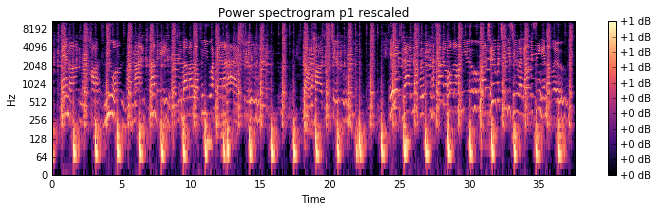

In [19]:
plt.figure(figsize=(10,3))
librosa.display.specshow(p1_toF0_log, y_axis='log', x_axis='time')
plt.title('Power spectrogram p1 rescaled')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


### Input for VAD - Voice Activity Detection

In [20]:
# The input for VAD is the whole signal s = h1 + h2 + p2 in MFCC features
h1_mfcc = librosa.feature.melspectrogram(y=h1_inverse, sr=sr, n_fft=512, hop_length=128, n_mels=40, fmax=8000)
h2_mfcc = librosa.feature.melspectrogram(y=h2_inverse, sr=sr, n_fft=512, hop_length=128, n_mels=40, fmax=8000)
p2_mfcc = librosa.feature.melspectrogram(y=p2_inverse, sr=sr, n_fft=512, hop_length=128, n_mels=40, fmax=8000)

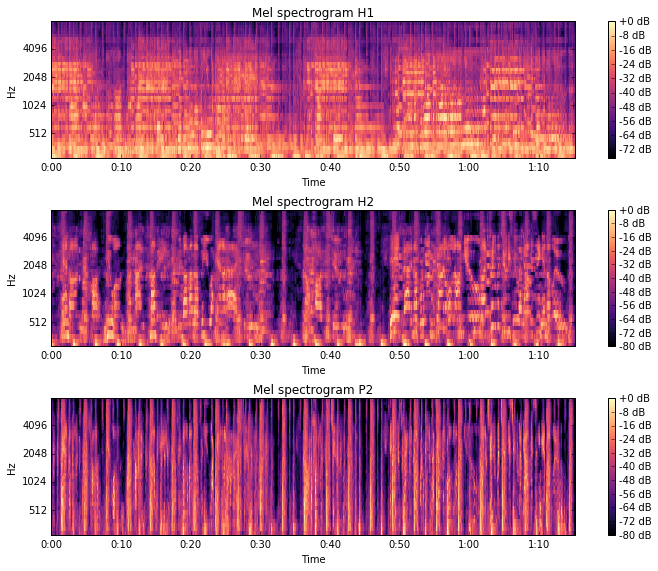

In [21]:
plt.figure(figsize=(10, 8))
ax1 = plt.subplot(3,1,1)
librosa.display.specshow(librosa.power_to_db(h1_mfcc, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram H1')
plt.tight_layout()

ax2 = plt.subplot(3,1,2)
librosa.display.specshow(librosa.power_to_db(h2_mfcc, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram H2')
plt.tight_layout()

ax3 = plt.subplot(3,1,3)
librosa.display.specshow(librosa.power_to_db(p2_mfcc, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram P2')
plt.tight_layout()

## Saving feature computation and labels

### Input for the F0-Estimator

In [22]:
# Write features file 
with open(path+'features/'+music+'_features.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    col = p1_toF0_log.shape[1]
    for i in range(col):
        spamwriter.writerow(p1_toF0_log[:,i])

### Input for the VAD

In [23]:
# Write mfcc file 
with open(path+'mfcc/'+music+'_mfcc.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    col = h1_mfcc.shape[1]
    row = np.ndarray(shape=(3*40,))
    for i in range(col):
        row[  :40] = h1_mfcc[:,i]
        row[40:80] = h2_mfcc[:,i]
        row[80:  ] = p2_mfcc[:,i]
        spamwriter.writerow(row) ### Put the mfcc from h1+h2+p2

### Labels

In [24]:
# Annotation 1 - Save with double frequency
label_path = "../MedleyDB/Annotations/labels/"
annot_path = "../MedleyDB/Annotations/"+music+"_MELODY1.csv"

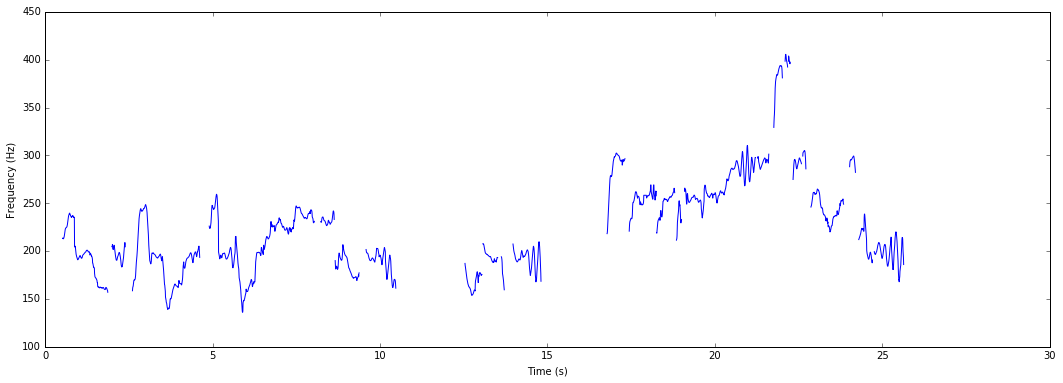

In [25]:
melody = []
timestamps = []

with open(annot_path) as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        timestamps.append(float(row[0]))
        melody.append(float(row[1]))
        
        
# Annotation sample rate is 44.1 kHz
# Append element to make size equal of spectrogram
melody.append(0)
timestamps.append(0)

# None to values less equals 0
melody_pos = melody[:].copy()
for i in range(len(melody_pos)):
    if melody_pos[i] <= 0:
        melody_pos[i] = None

# Plot melodic line from annotation
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody_pos)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [26]:
# Convert annotation data to 16kHz
Horig  = 256
SRorig = 44100

Hnew  = 128
SRnew = 16000

size = h1_mfcc.shape[1]

j = np.arange(size) * (SRorig/Horig * Hnew/SRnew)

3241 3241


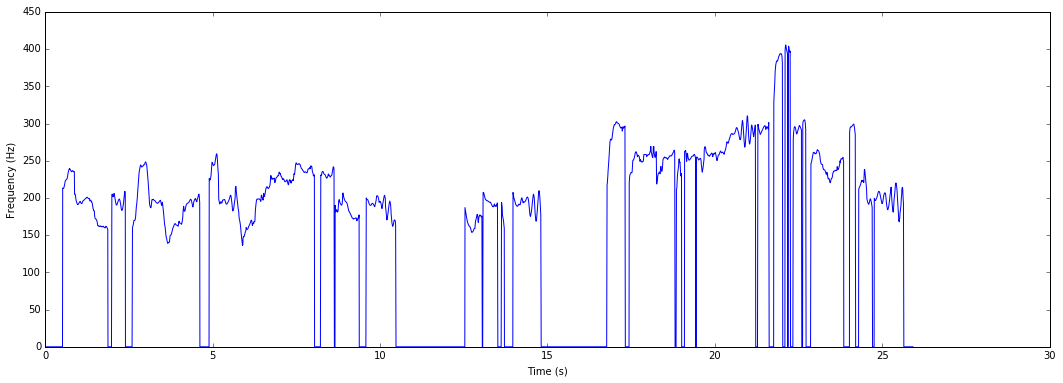

In [27]:
# Resample to 16kHz
# None to values less equals 0
melody_res = np.zeros(len(j))
tmstamps = np.zeros(len(j))
for i in range(len(j)):
    melody_res[i] = melody[int(j[i])]   # Get label more near from this frame resampled
    tmstamps[i] = timestamps[int(j[i])]
    if melody_res[i] <= 0:
        melody_res[i] = 0

print (len(melody_res), len(tmstamps))

# Plot melodic line from annotation
plt.figure(figsize=(18,6))
plt.plot(tmstamps, melody_res)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [28]:
T = np.arange(193)
# Value 4 is log2(1108.73) - log2(69.29)
T1 = np.linspace(0,4, 193)

# Define what value will be get from original annotation
def find_nearest(array,value):
    i = (np.abs(array-value)).argmin()
    return i

# Save labels file
with open(label_path+music+'_labels.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(melody_res)):
        if melody_res[i] == 0:
            spamwriter.writerow("0")
        else:
            label = find_nearest(T1, np.log2(melody_res[i])-np.log2(69.29))
            spamwriter.writerow([label])